In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# ---------- Load ----------
df = pd.read_csv("/Users/michaelwalker/RDM_Datalab/tri_release_by_county_naics.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michaelwalker/RDM_Datalab/tri_release_by_county_naics.csv'

In [2]:
#Clean column names
df.columns = [c.strip().lower() for c in df.columns]
key_map = {
    "state": "state",
    "county": "county",
    "naics2": "naics2",
    "tri_releases_lbs": "tri_releases_lbs"
}
df = df.rename(columns=key_map)
df["tri_releases_lbs"] = pd.to_numeric(df["tri_releases_lbs"], errors="coerce").fillna(0)

In [3]:
#
# ---------- Derived metrics ----------
df["tri_releases_log10"] = np.where(df["tri_releases_lbs"]>0,
                                    np.log10(df["tri_releases_lbs"]), np.nan)

# Percentile bins (0–100)
df["tri_releases_pctile"] = pd.qcut(df["tri_releases_lbs"].rank(method="first"),
                                    q=100, labels=False)

/opt/miniconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df.head(50)

,state,county,naics2,tri_releases_lbs,tri_releases_log10,tri_releases_pctile
0,AK,ALEUTIANS EAST BOROUGH,31,1.962770e+05,5.292869,80
1,AK,ALEUTIANS WEST CENSUS ARE,31,2.816000e+03,3.449633,36
2,AK,ALEUTIANS WEST CENSUS ARE,42,2.561228e+02,2.408448,24
3,AK,ANCHORAGE MUNICIPALITY,32,2.550000e+02,2.406540,23
4,AK,ANCHORAGE MUNICIPALITY,42,1.203838e+04,4.080568,49
5,AK,ANCHORAGE MUNICIPALITY,92,3.816450e+04,4.581660,63
6,AK,BETHEL CENSUS AREA,42,7.814500e+02,2.892901,29
7,AK,BRISTOL BAY BOROUGH,31,1.353800e+04,4.131555,50
8,AK,DENALI BOROUGH,21,1.834093e+05,5.263421,80
9,AK,DENALI BOROUGH,22,5.394602e+05,5.731959,89


In [6]:
# ---------- Aggregations ----------
by_county_naics = df.groupby(["state","county","naics2"], as_index=False)["tri_releases_lbs"].sum()

by_state_naics = (by_county_naics.groupby(["state","naics2"], as_index=False)
                  ["tri_releases_lbs"].sum()
                  .assign(level="state"))

by_naics = (by_county_naics.groupby("naics2", as_index=False)
            ["tri_releases_lbs"].sum()
            .assign(level="national"))

In [7]:
# ---------- Save clean CSVs ----------
by_county_naics.to_csv("/Users/michaelwalker/RDM_Datalab/tri_summary_county_naics2.csv", index=False)
by_state_naics.to_csv("/Users/michaelwalker/RDM_Datalab/tri_summary_state_naics2.csv", index=False)
by_naics.to_csv("/Users/michaelwalker/RDM_Datalab/tri_summary_naics2.csv", index=False)

print("✅ Saved:")
print(" - tri_summary_county_naics2.csv")
print(" - tri_summary_state_naics2.csv")
print(" - tri_summary_naics2.csv")

✅ Saved:
 - tri_summary_county_naics2.csv
 - tri_summary_state_naics2.csv
 - tri_summary_naics2.csv


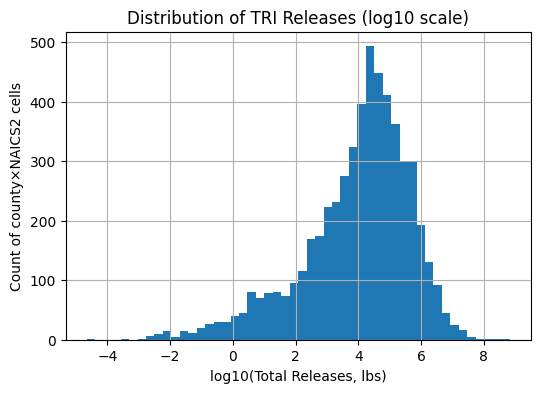


Top 10 counties by total TRI releases:
     state                    county  naics2  tri_releases_lbs
28      AK  NORTHWEST ARCTIC BOROUGH      21      6.586649e+08
3577    NV                      ELKO      21      2.113360e+08
5364    UT                 SALT LAKE      21      1.323864e+08
19      AK   JUNEAU CITY AND BOROUGH      21      9.226872e+07
3547    NM                       LEA      21      6.445059e+07
...    ...                       ...     ...               ...
1933    KY                CUMBERLAND      33      0.000000e+00
5456    VA                   FAIRFAX      92      0.000000e+00
4063    OK                  GARFIELD      33      0.000000e+00
1941    KY                   FLEMING      31      0.000000e+00
2954    MS                  MARSHALL      31      0.000000e+00

[6027 rows x 4 columns]

Top 10 NAICS2 sectors by total TRI releases:
    naics2  tri_releases_lbs     level
1       21      1.572445e+09  national
5       32      7.768456e+08  national
6       33      

In [8]:
# ---------- Optional: quick visuals ----------
plt.figure(figsize=(6,4))
df["tri_releases_log10"].hist(bins=50)
plt.title("Distribution of TRI Releases (log10 scale)")
plt.xlabel("log10(Total Releases, lbs)")
plt.ylabel("Count of county×NAICS2 cells")
plt.show()

print("\nTop 10 counties by total TRI releases:")
#print(by_county_naics.sort_values("tri_releases_lbs", ascending=False).head(10))
print(by_county_naics.sort_values("tri_releases_lbs", ascending=False))

print("\nTop 10 NAICS2 sectors by total TRI releases:")
print(by_naics.sort_values("tri_releases_lbs", ascending=False).head(10))

## County FIPS enrichment prototype
This section shows how to derive five-digit `state_cnty_fips_cd` codes for TRI rows **before** loading to BigQuery by joining against the Simplemaps county reference. Once this logic looks good, we'll port it into `scripts/epa/tri_2022_county_naics2_pipeline.py`.

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

# ---------------------------------------------------------------------------
# 1) Configure file paths (adjust if raw files live elsewhere)
# ---------------------------------------------------------------------------
tri_facilities_path = Path("data_raw/tri/tri_facilities_2022.csv")
county_ref_path = Path("data_raw/external/simplemaps/simplemaps_uscounties_basicv1.91/uscounties.csv")

# These CSVs may be large, so we read them with dtype=str to preserve leading zeros
tri_raw = pd.read_csv(tri_facilities_path, dtype=str, low_memory=False)
county_ref = pd.read_csv(county_ref_path, dtype=str)

print(f"TRI rows: {len(tri_raw):,}")
print(f"County reference rows: {len(county_ref):,}")

# ---------------------------------------------------------------------------
# 2) Normalize the fields that we'll use for joining
# ---------------------------------------------------------------------------
def normalize_county_name(series: pd.Series) -> pd.Series:
    """Lower-case, strip whitespace/punctuation, remove common suffixes (County, Parish, etc.)."""
    cleaned = (series.fillna("")
                     .str.lower()
                     .str.strip())
    cleaned = (cleaned.str.replace(r"[^a-z0-9\s]", "", regex=True)
                         .str.replace(r"(county|parish|borough|municipio|census area|city and borough|city)", "", regex=True)
                         .str.replace(r"\s+", " ", regex=True)
                         .str.strip())
    return cleaned

# TRI file does not always ship FIPS, but it always has STATE (postal) + county name fields
tri_raw['state_code'] = tri_raw['STATE'].str.upper()
tri_raw['county_name_norm'] = normalize_county_name(tri_raw['COUNTY NAME'])

# Simplemaps provides a very complete mapping of county names ↔ FIPS
county_ref['state_code'] = county_ref['state_id'].str.upper()
county_ref['county_name_norm'] = normalize_county_name(county_ref['county_full'])
county_ref['county_fips_5'] = county_ref['county_fips'].astype(str).str.zfill(5)

ref_cols = ['state_code','county_name_norm','county_fips_5']
county_ref_dedup = county_ref[ref_cols].drop_duplicates()

# ---------------------------------------------------------------------------
# 3) Join TRI ← reference to fill in five-digit county codes
# ---------------------------------------------------------------------------
tri_enriched = (tri_raw.merge(county_ref_dedup, on=['state_code','county_name_norm'], how='left', indicator=True))
tri_enriched['state_fips_cd'] = tri_enriched['county_fips_5'].str[:2]
tri_enriched['county_fips_cd'] = tri_enriched['county_fips_5'].str[2:]
tri_enriched['state_cnty_fips_cd'] = tri_enriched['county_fips_5']

match_rate = tri_enriched['state_cnty_fips_cd'].notna().mean()
print(f"Match rate: {match_rate:.2%}")

unmatched = tri_enriched[tri_enriched['state_cnty_fips_cd'].isna()]
print(f"Unmatched rows: {len(unmatched):,}")
print(unmatched[['state_code','COUNTY NAME']].head())

# Optional: review the most common unmatched county names for manual tweaks
print(unmatched['COUNTY NAME'].value_counts().head(10))

# ---------------------------------------------------------------------------
# 4) Apply QA checks we want before writing outputs
# ---------------------------------------------------------------------------
assert tri_enriched['state_cnty_fips_cd'].str.len().dropna().eq(5).all(), "FIPS codes must be 5 characters"
assert (tri_enriched['county_fips_cd'].dropna().str.len() == 3).all(), "County FIPS codes should be 3 digits"

tri_enriched.head()
